In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
import os
print("INPUT FOLDER:")
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load MADRS held in score
scores =  pd.read_csv("../content/input/the-depression-dataset/data/scores.csv")
MADRS1 = np.array(scores["madrs1"])
MADRS2 = np.array(scores["madrs2"])
MADRS = np.vstack((MADRS1,MADRS2))

# discard Nan (healty subjects),keep the average of only condition subjects for convenience
import math
nanvals = np.where(np.isnan(MADRS))
MADRS = np.delete(MADRS, nanvals[1], 1)

MADRS = np.mean(MADRS, axis = 0)

INPUT FOLDER:
/content/input/the-depression-dataset/data/scores.csv
/content/input/the-depression-dataset/data/condition/condition_14.csv
/content/input/the-depression-dataset/data/condition/condition_21.csv
/content/input/the-depression-dataset/data/condition/condition_22.csv
/content/input/the-depression-dataset/data/condition/condition_10.csv
/content/input/the-depression-dataset/data/condition/condition_2.csv
/content/input/the-depression-dataset/data/condition/condition_12.csv
/content/input/the-depression-dataset/data/condition/condition_16.csv
/content/input/the-depression-dataset/data/condition/condition_6.csv
/content/input/the-depression-dataset/data/condition/condition_19.csv
/content/input/the-depression-dataset/data/condition/condition_9.csv
/content/input/the-depression-dataset/data/condition/condition_11.csv
/content/input/the-depression-dataset/data/condition/condition_15.csv
/content/input/the-depression-dataset/data/condition/condition_20.csv
/content/input/the-depres

In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

In [22]:
scores =  pd.read_csv('scores.csv')
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [23]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [24]:
scores['DeltaMADRS'] = scores.madrs2 - scores.madrs1
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [25]:
scores.edu = scores['edu'].replace(' ', np.NaN)
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [26]:
scores.age = scores.age.astype('category')
scores.gender = scores.gender.astype('category')
scores.edu = scores.edu.astype('category')
scores.afftype = scores.afftype.astype('category')
scores.melanch = scores.melanch.astype('category')
scores.inpatient = scores.inpatient.astype('category')
scores.marriage = scores.marriage.astype('category')
scores.work = scores.work.astype('category')
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [27]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      55 non-null     object  
 1   days        55 non-null     int64   
 2   gender      55 non-null     category
 3   age         55 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [28]:
scores.gender = scores['gender'].cat.rename_categories({1.0 : 'female',2.0:'male'})
scores.afftype = scores['afftype'].cat.rename_categories({1.0 : 'bipolar II',2.0:'unipolar', 3: 'bipolar I'})
scores.melanch = scores['melanch'].cat.rename_categories({1.0 : 'melancholia',2.0:'No melancholia'})
scores.inpatient = scores['inpatient'].cat.rename_categories({1.0 : 'inpatient',2.0:'outpatient'})
scores.marriage = scores['marriage'].cat.rename_categories({1.0 : 'married/cohabitating',2.0:'single'})
scores.work = scores['work'].cat.rename_categories({1.0 : 'Work/Study',2.0:'Unemployed/Sick leave/Pension'})
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0,0.0
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,11.0,-13.0
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,25.0,1.0
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married/cohabitating,Work/Study,20.0,16.0,-4.0
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,Unemployed/Sick leave/Pension,26.0,26.0,0.0
5,condition_6,7,female,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,18.0,15.0,-3.0
6,condition_7,11,female,20-24,bipolar II,NaN,outpatient,11-15,single,Work/Study,24.0,25.0,1.0
7,condition_8,5,male,25-29,unipolar,NaN,outpatient,11-15,married/cohabitating,Unemployed/Sick leave/Pension,20.0,16.0,-4.0
8,condition_9,13,male,45-49,bipolar II,NaN,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,26.0,26.0,0.0
9,condition_10,9,male,45-49,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,28.0,21.0,-7.0


In [29]:
scores_condition = scores[scores.number.str.contains('condition')].copy()
scores_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      23 non-null     object  
 1   days        23 non-null     int64   
 2   gender      23 non-null     category
 3   age         23 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [30]:
scores_control = scores[scores.number.str.contains('control')].copy()
scores_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 23 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      32 non-null     object  
 1   days        32 non-null     int64   
 2   gender      32 non-null     category
 3   age         32 non-null     category
 4   afftype     0 non-null      category
 5   melanch     0 non-null      category
 6   inpatient   0 non-null      category
 7   edu         0 non-null      category
 8   marriage    0 non-null      category
 9   work        0 non-null      category
 10  madrs1      0 non-null      float64 
 11  madrs2      0 non-null      float64 
 12  DeltaMADRS  0 non-null      float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.0+ KB


In [31]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

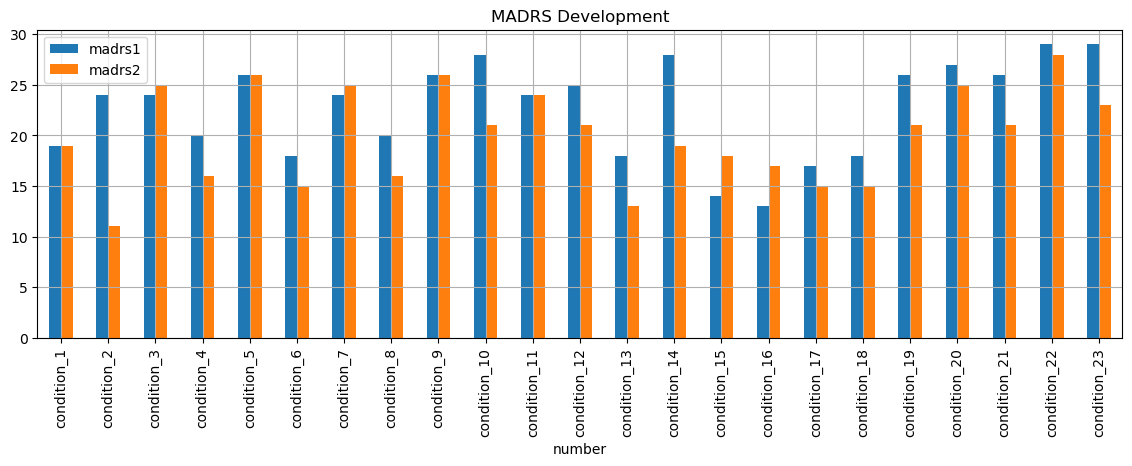

In [32]:
# barplot of MADRS scores (before/after)
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

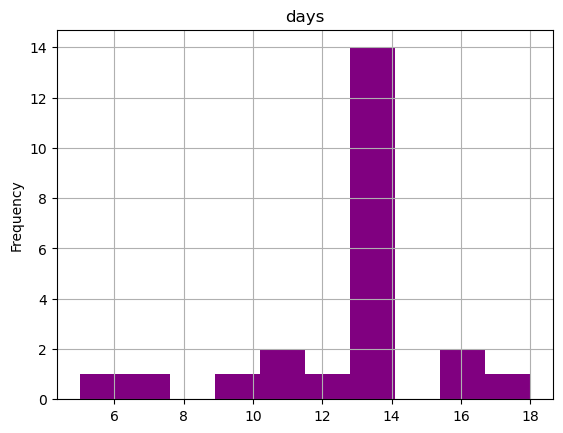

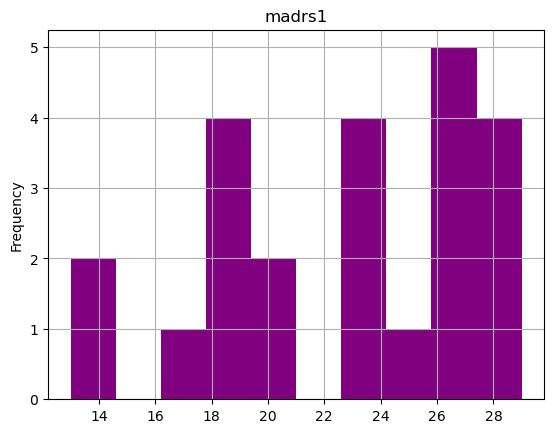

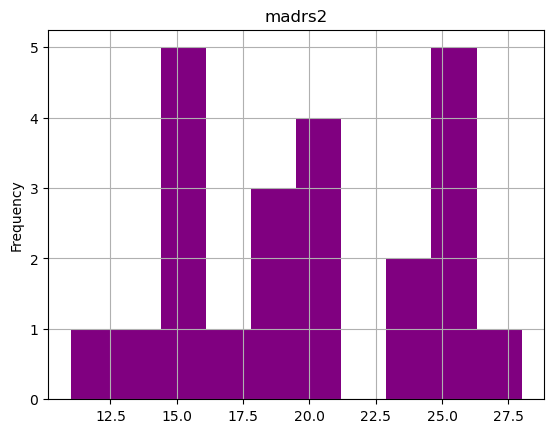

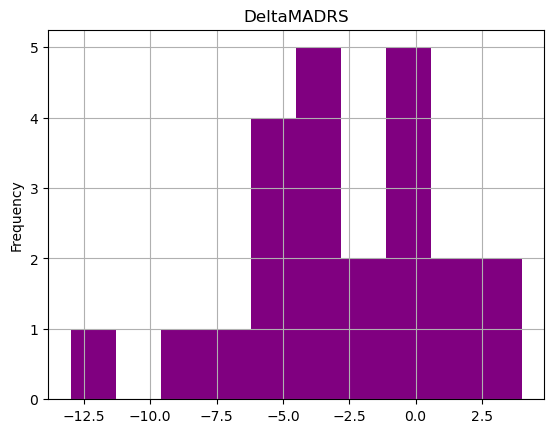

In [33]:
for f in features_num:
    scores_condition[f].plot.hist(color = "Purple")
    plt.title(f)
    plt.grid()
    plt.show()

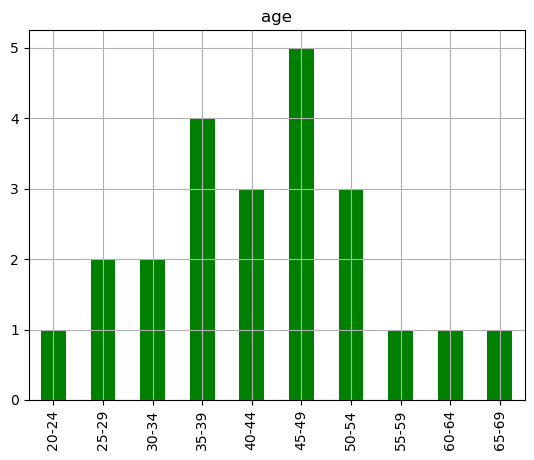

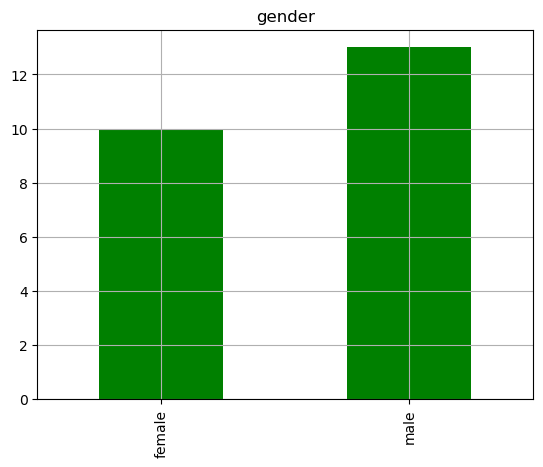

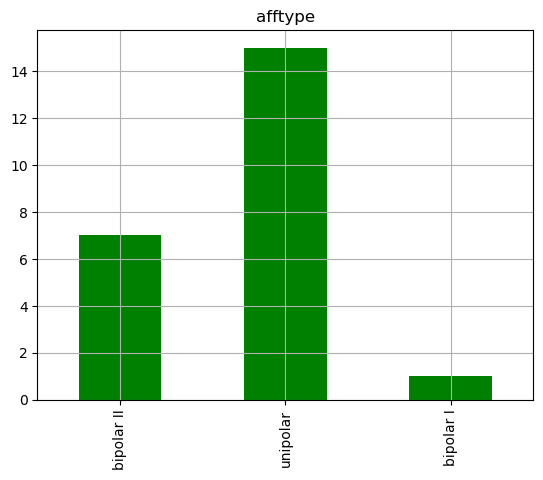

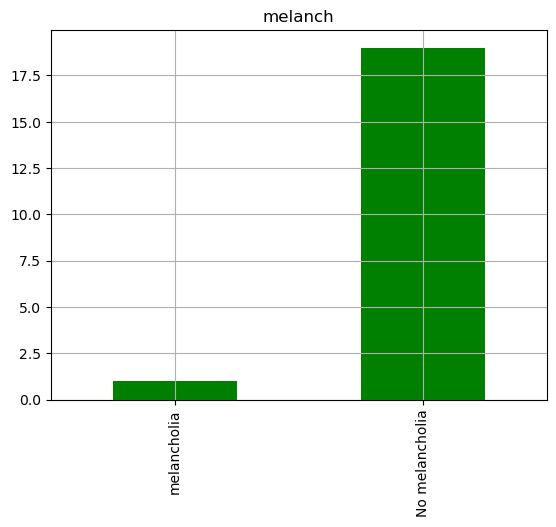

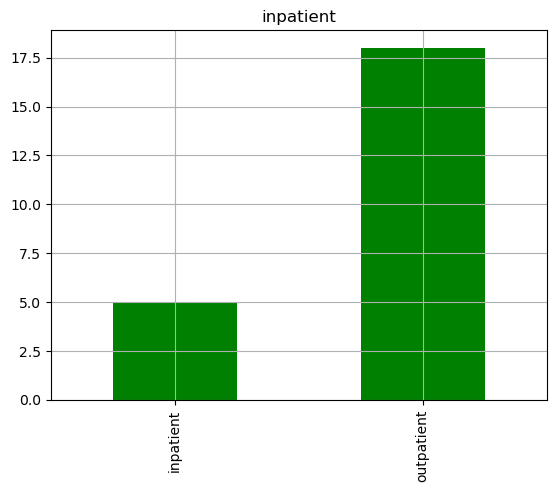

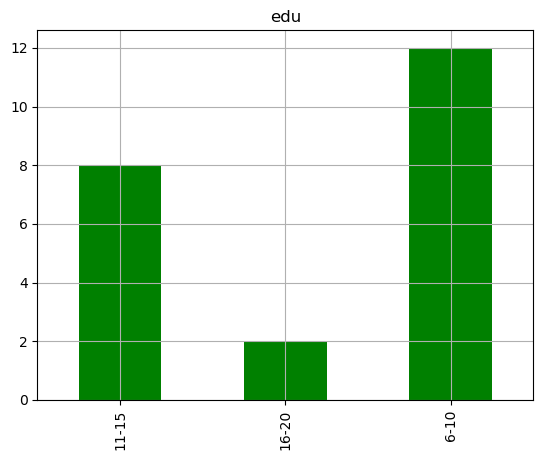

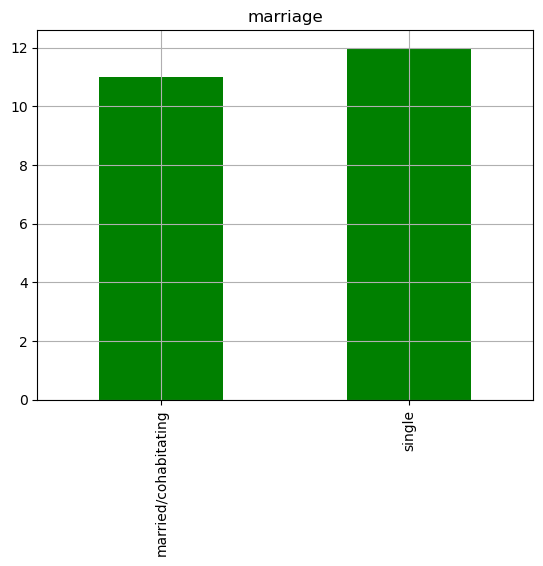

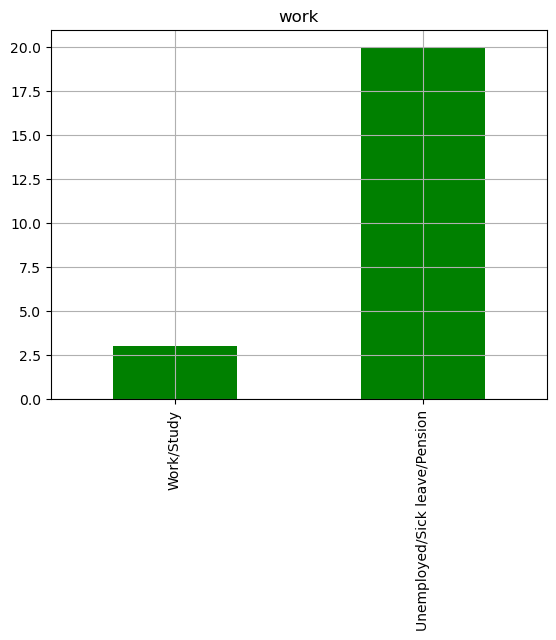

In [34]:
for f in features_cat:
    scores_condition[f].value_counts().sort_index().plot(kind='bar', color ="green")
    plt.title(f)
    plt.grid()
    plt.show()

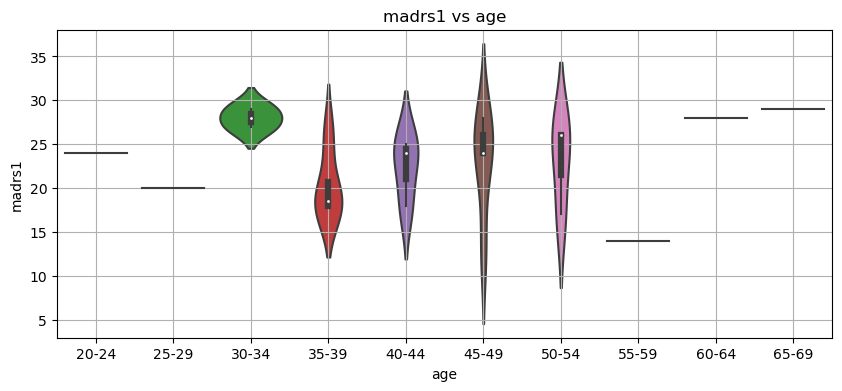

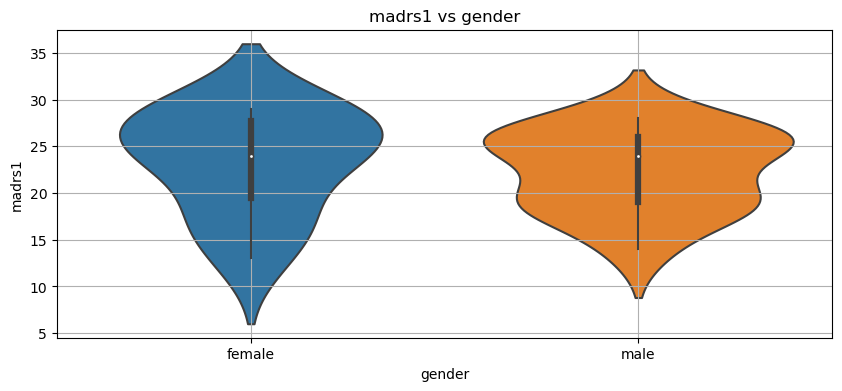

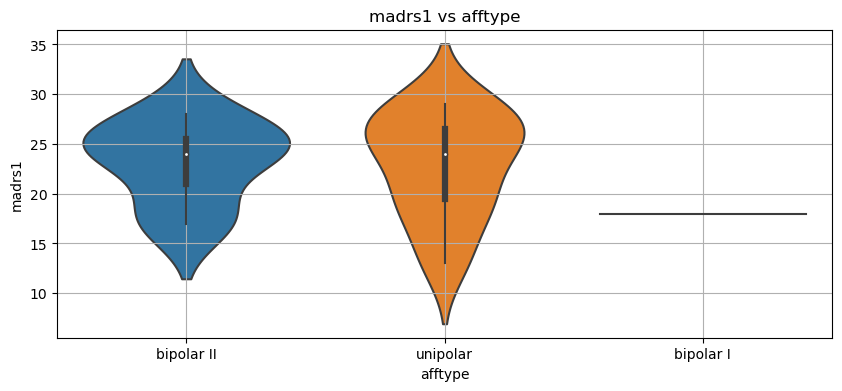

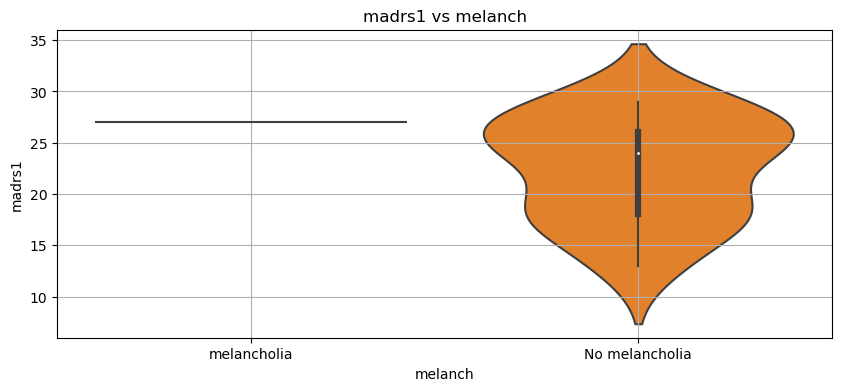

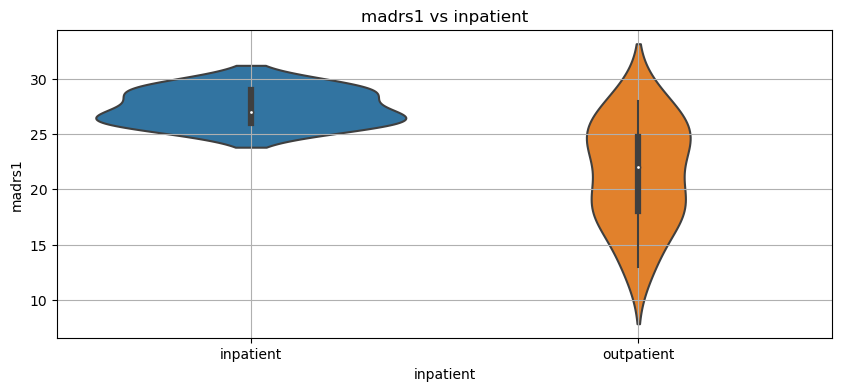

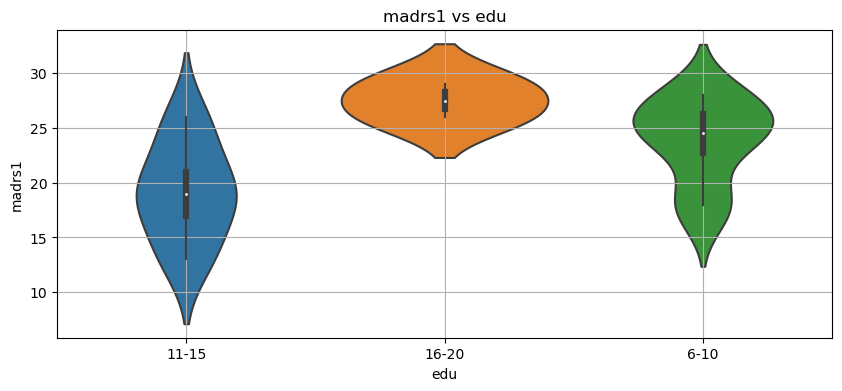

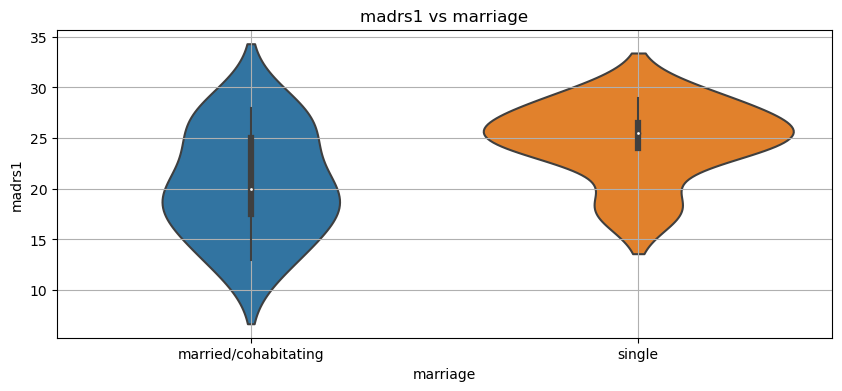

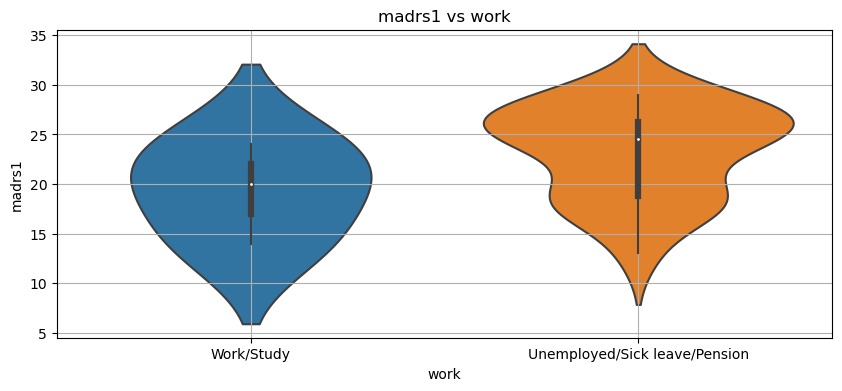

In [35]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

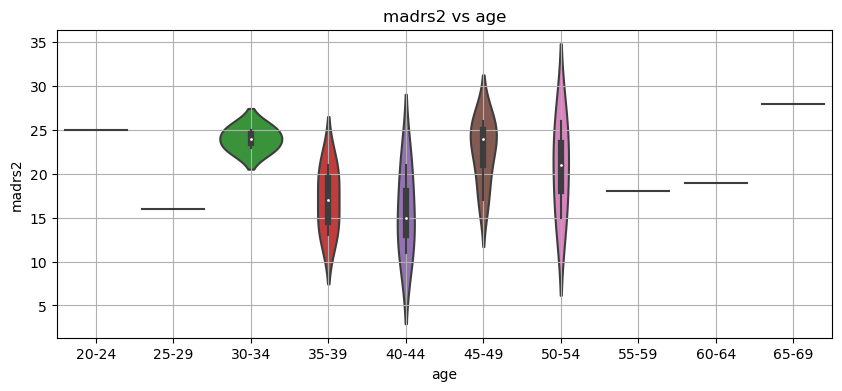

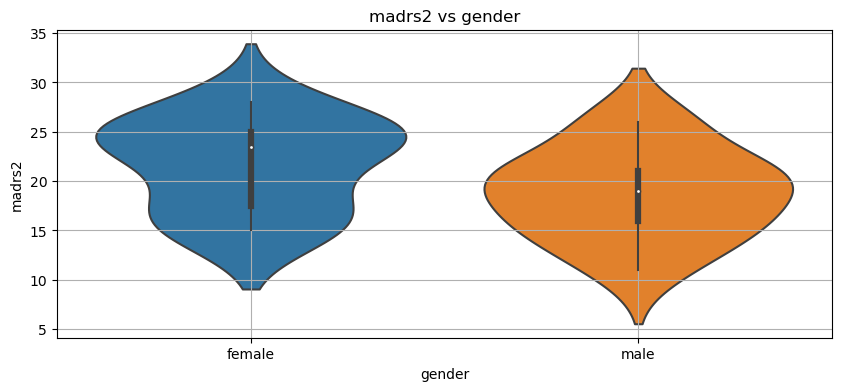

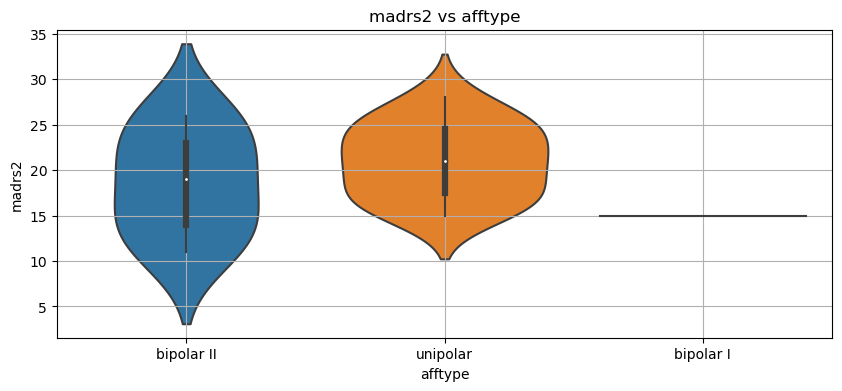

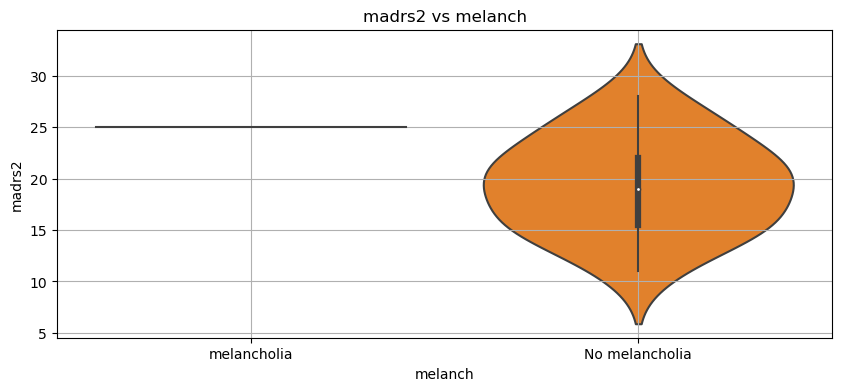

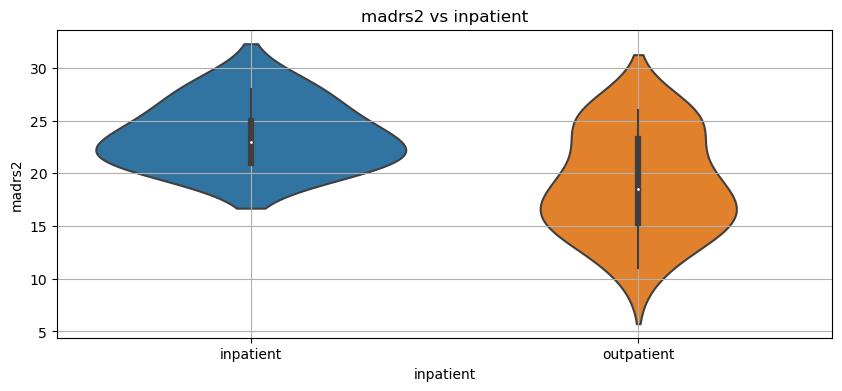

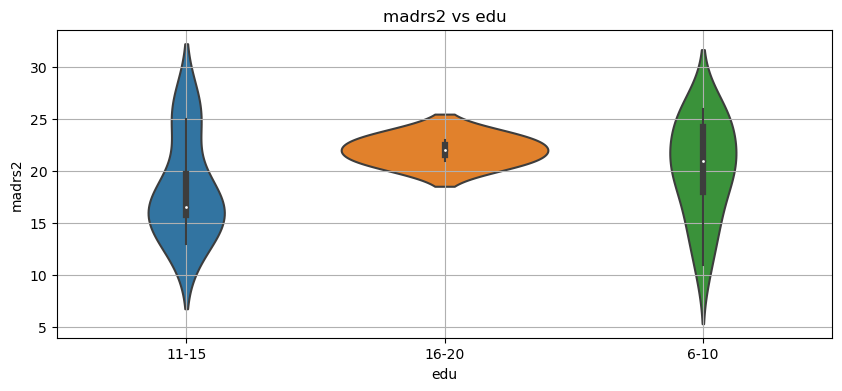

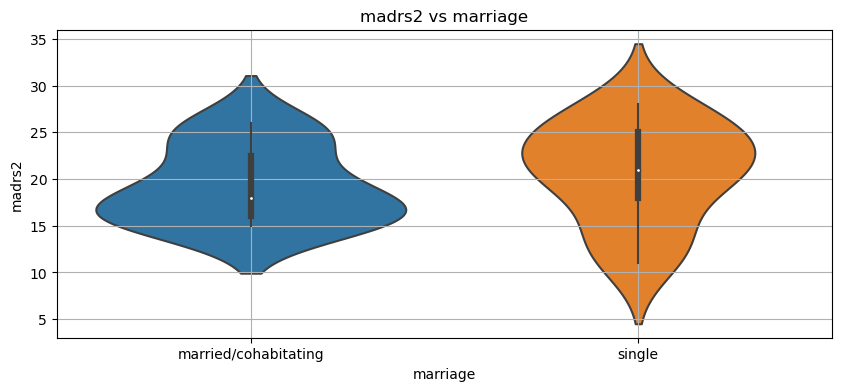

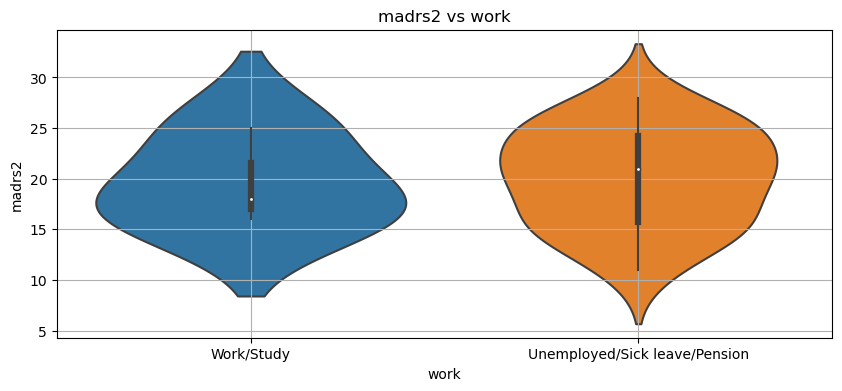

In [36]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

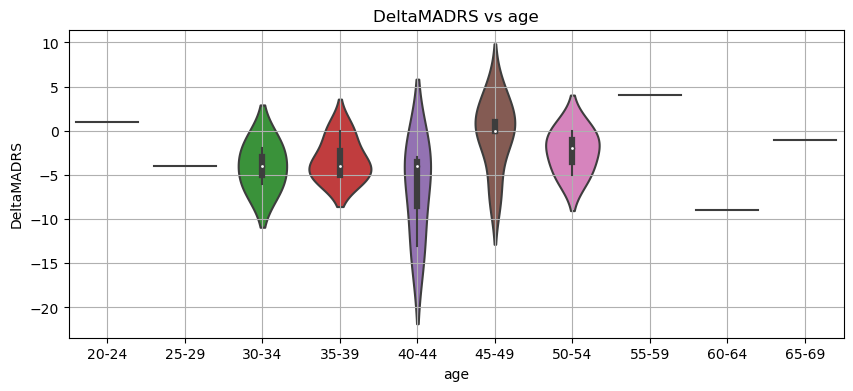

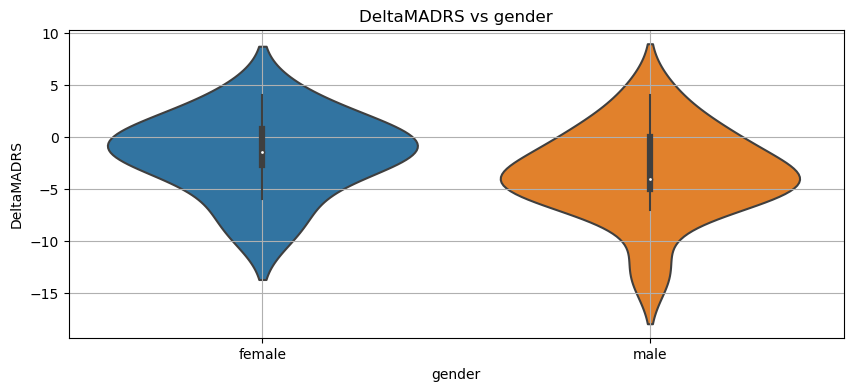

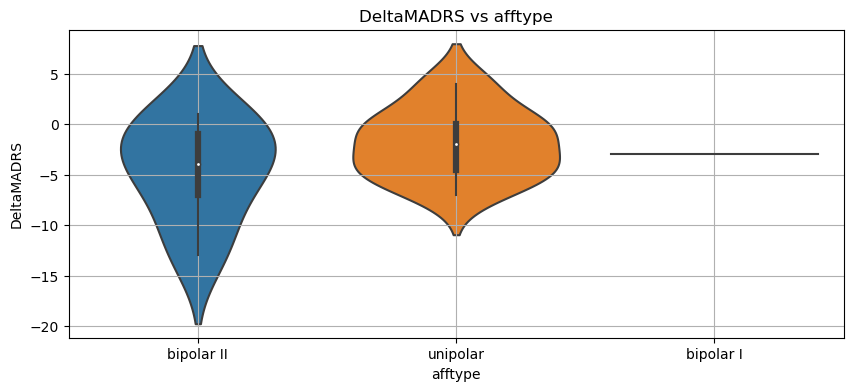

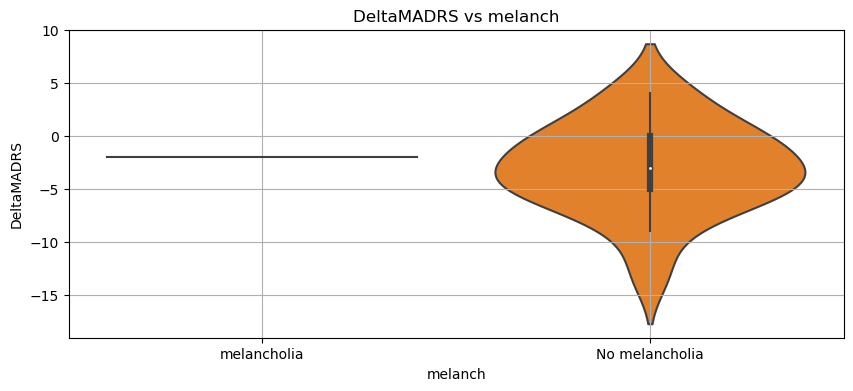

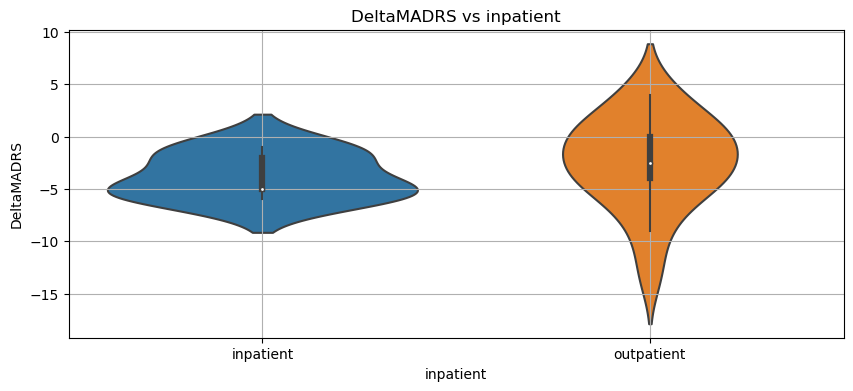

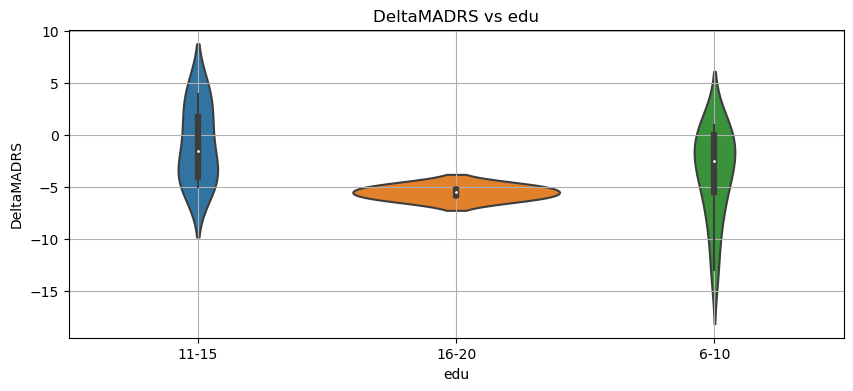

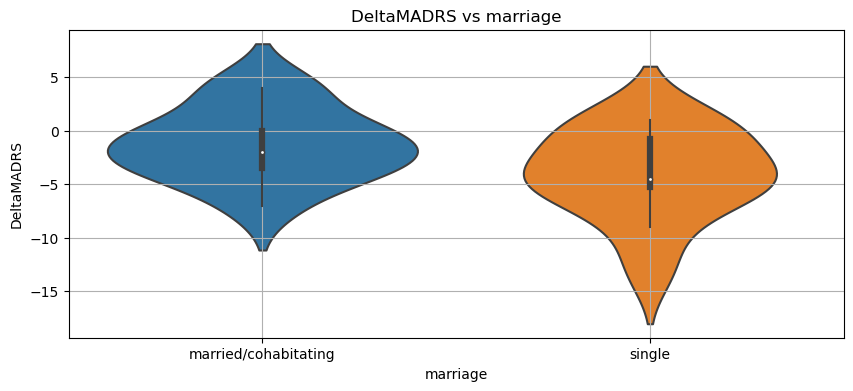

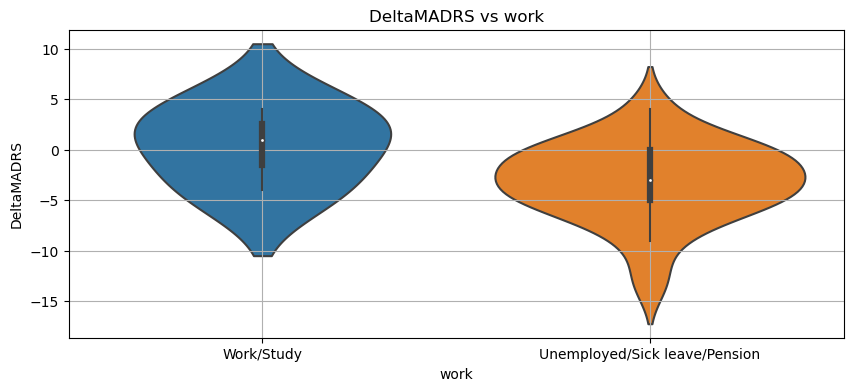

In [37]:
# impact of feature on score difference DeltaMADRS = madrs2 - madrs1
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()

In [38]:
control_1 = pd.read_csv('control_1.csv')
condition_1 = pd.read_csv('condition_1.csv')
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')

control_1.shape: (51611, 3)
condition_1.shape: (23244, 3)


In [39]:
control_1.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [40]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [41]:
condition_1.timestamp = condition_1.timestamp.str.split(' ', expand=True)[[1]]
condition_1

,timestamp,date,activity
0,12:00:00,2003-05-07,0
1,12:01:00,2003-05-07,143
2,12:02:00,2003-05-07,0
3,12:03:00,2003-05-07,20
4,12:04:00,2003-05-07,166
...,...,...,...
23239,15:19:00,2003-05-23,0
23240,15:20:00,2003-05-23,0
23241,15:21:00,2003-05-23,0
23242,15:22:00,2003-05-23,0


In [42]:
#hourly:
condition_1['hour'] = condition_1.timestamp.str.split(':', expand=True)[[0]]
condition_1['hour']

0        12
1        12
2        12
3        12
4        12
         ..
23239    15
23240    15
23241    15
23242    15
23243    15
Name: hour, Length: 23244, dtype: object

In [43]:
ab = condition_1.groupby(['date', 'hour'])['activity'].sum()
condition_1_aggr = pd.DataFrame(columns=('date','hour','activity'))
for i in range(0,len(ab)):
    condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
condition_1_aggr

C:\Users\vivek\AppData\Local\Temp\ipykernel_6736\1545983274.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_6736\1545983274.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_6736\1545983274.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
C:\Users\vivek\AppData

,date,hour,activity
0,2003-05-07,12,20793
1,2003-05-07,13,17074
2,2003-05-07,14,16751
3,2003-05-07,15,13127
4,2003-05-07,16,14313
...,...,...,...
383,2003-05-23,11,0
384,2003-05-23,12,0
385,2003-05-23,13,0
386,2003-05-23,14,684


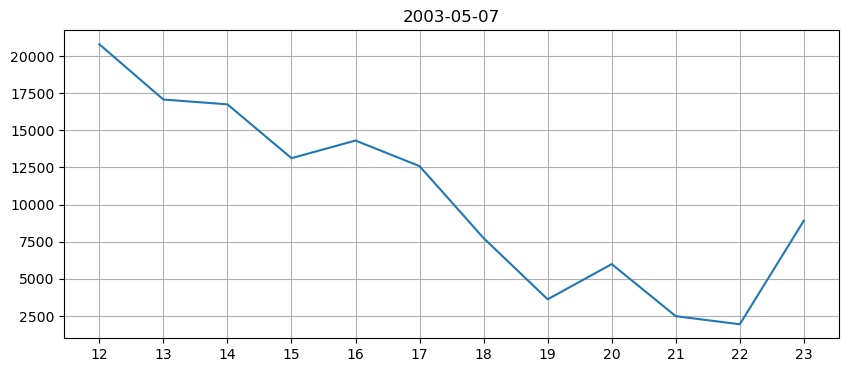

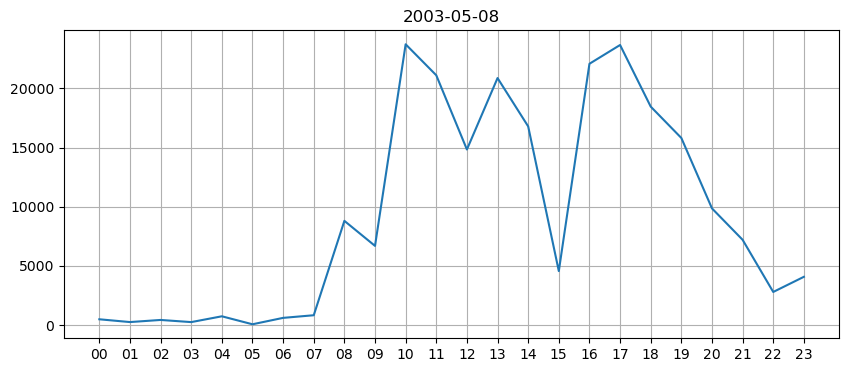

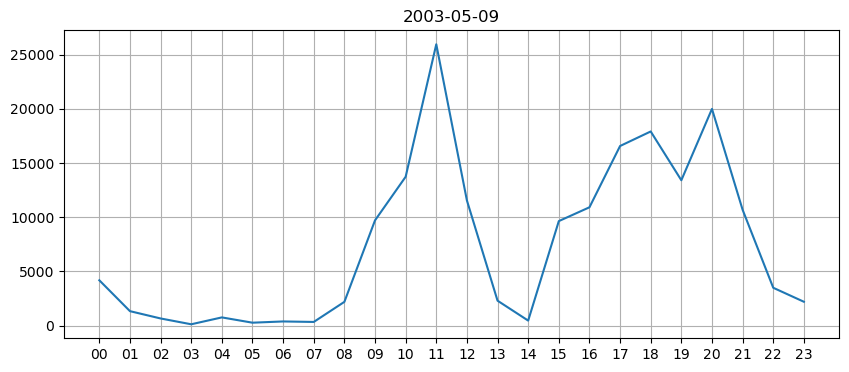

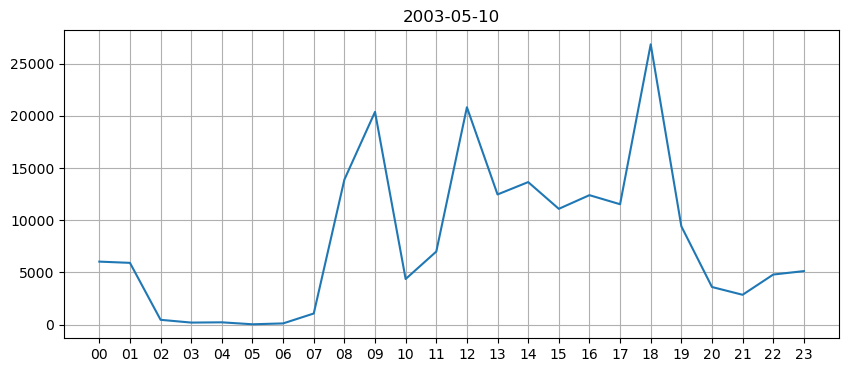

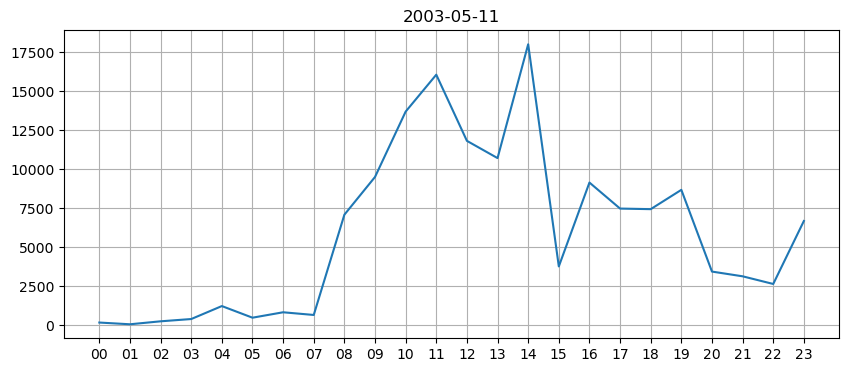

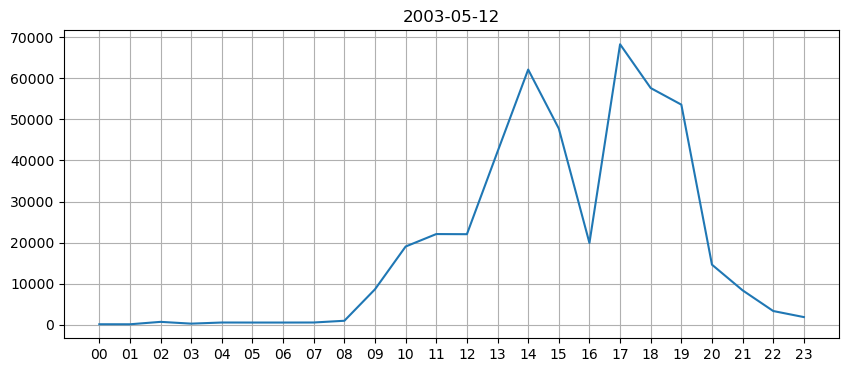

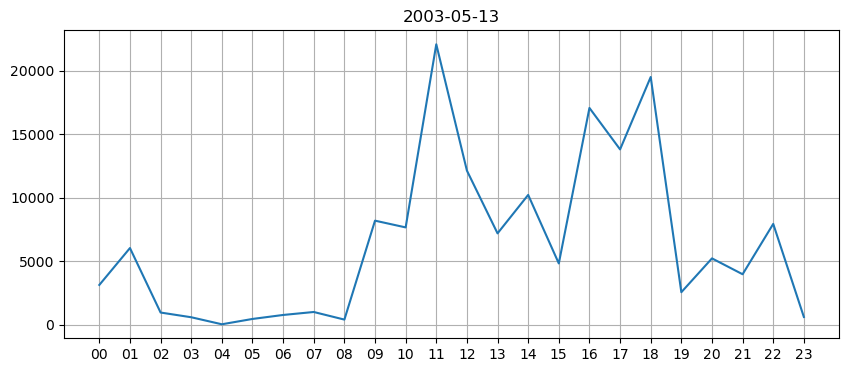

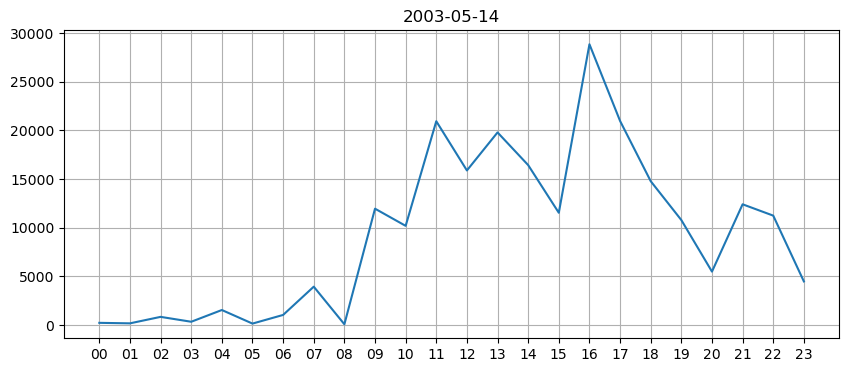

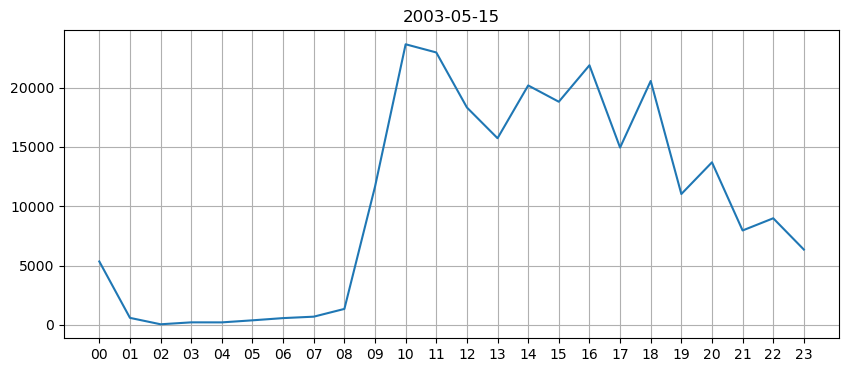

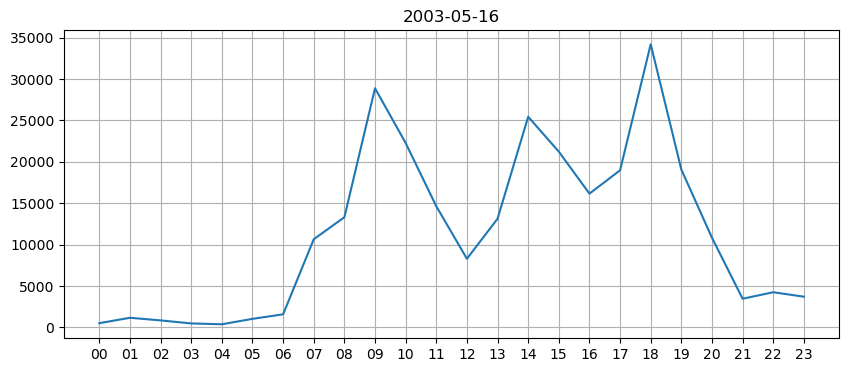

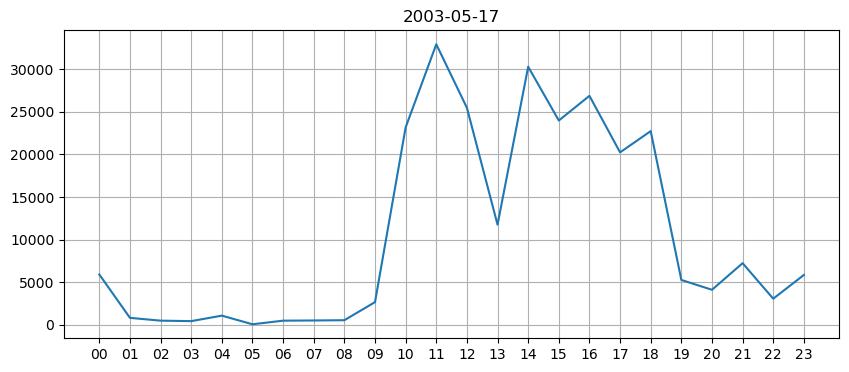

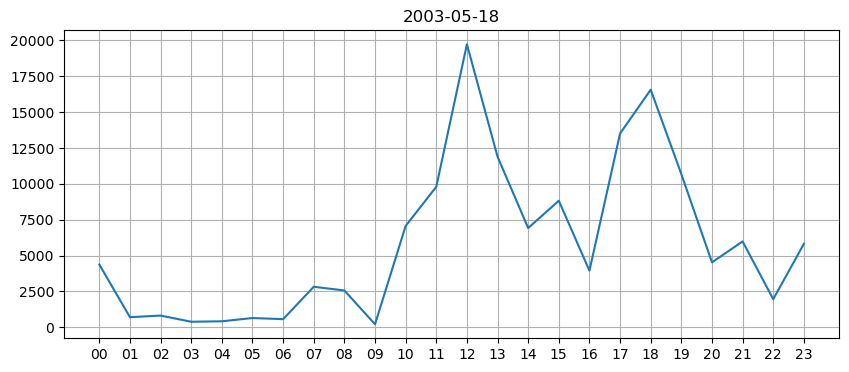

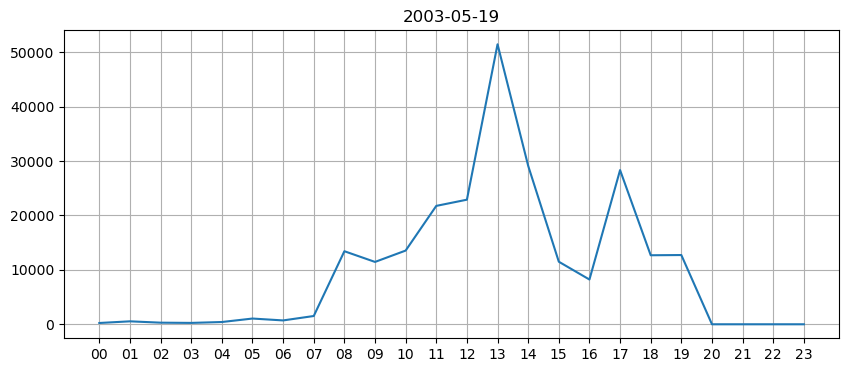

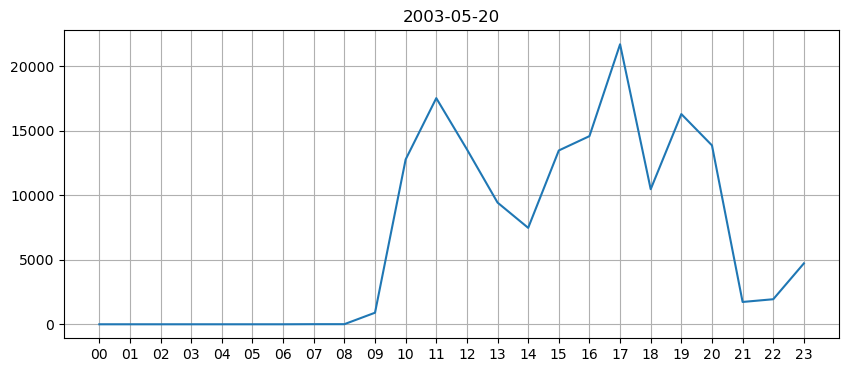

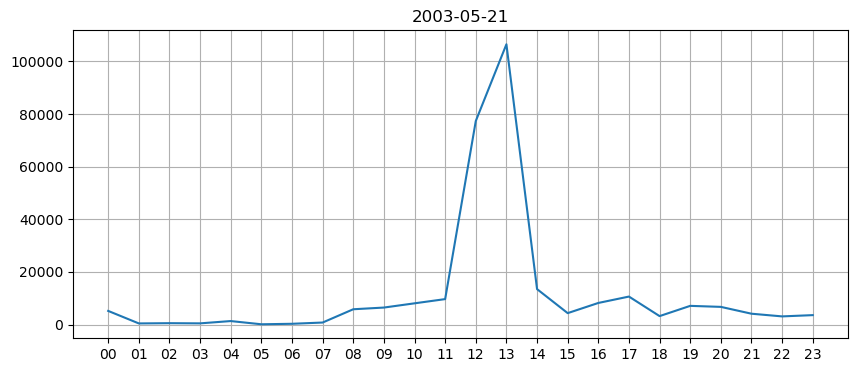

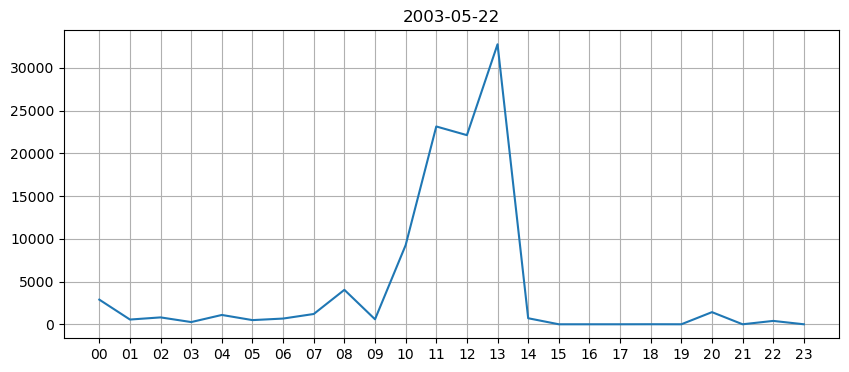

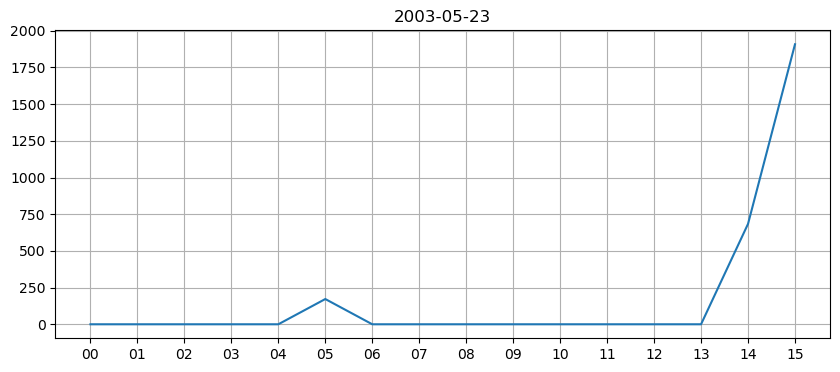

In [44]:
for i in condition_1_aggr.date.unique():
    plt.figure(figsize=(10,4))
    selected_data = condition_1_aggr.loc[condition_1_aggr['date'] == i]
    plt.plot(selected_data['hour'], selected_data['activity'])
    plt.title(i)
    plt.grid()
    plt.show()

In [45]:
def nextday(dates):
    for date in dates:
        yield date

In [46]:
def zero_count(series):
    return list(series).count(0)

In [47]:
def extractfeatures(X, date):
    mask = X['date'] == date
    d = {
        'mean_log_activity': X[mask]['log_activity'].mean(),
        'std_log_activity': X[mask]['log_activity'].std(),
        'min_log_activity': X[mask]['log_activity'].min(),
        'max_log_activity': X[mask]['log_activity'].max(),
        'zero_proportion_activity': zero_count(X[mask]['log_activity'])
    }
    return d

In [48]:
class ExtractData(BaseEstimator, TransformerMixin):
    
    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dirs = os.listdir(self.path)
        
        for filepath in sorted(dirs, key=lambda x: x.split('_')[0]):
            condition = filepath.split('.')[0]
            if filepath.endswith('.csv'):
                X = pd.read_csv(self.path + filepath)
                X['log_activity'] = np.log(X['activity'] + 1)
                dates = X.date.unique()
                
                for date in nextday(dates):
                    d = extractfeatures(X, date)
                    d['source'] = condition
                    self.X.append(d)
                

        return pd.DataFrame(self.X)

In [49]:
condition_1['state'] = 1

In [50]:
condition_1.tail()

,timestamp,date,activity,hour,state
23239,15:19:00,2003-05-23,0,15,1
23240,15:20:00,2003-05-23,0,15,1
23241,15:21:00,2003-05-23,0,15,1
23242,15:22:00,2003-05-23,0,15,1
23243,15:23:00,2003-05-23,533,15,1


In [51]:
control_1['state'] = 0

In [52]:
full_df = control_1.append(condition_1, ignore_index=True)
full_df.head()

C:\Users\vivek\AppData\Local\Temp\ipykernel_6736\2106909350.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = control_1.append(condition_1, ignore_index=True)


,timestamp,date,activity,state,hour
0,2003-03-18 15:00:00,2003-03-18,60,0,NaN
1,2003-03-18 15:01:00,2003-03-18,0,0,NaN
2,2003-03-18 15:02:00,2003-03-18,264,0,NaN
3,2003-03-18 15:03:00,2003-03-18,662,0,NaN
4,2003-03-18 15:04:00,2003-03-18,293,0,NaN


In [53]:
full_df.shape

(74855, 5)

In [54]:
full_df = full_df.sample(frac=1) 

In [55]:
def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label
    
    return X_train, X_test, y_train, y_test

In [56]:
class CustomClassifierCV(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_clf):
        self.base_clf = base_clf
    
    def fit(self, X, y=None):
        X['label'] = y
        participants = X.source.unique()
        folds = []
        
        predictions = [] # predicted labels
        actuals = [] # actual labels
            
        for p in participants:
            folds.append(X[X['source'] == p])
        
        for i in range(len(folds)):   
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]
            
            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_train_test_split(train_set.drop(['source'], axis=1),
                                    test_set.drop(['source'], axis=1))
            
            self.base_clf.fit(X_train, y_train)
            predictions.append(self.predict(X_test))
            actuals.append(test_set.label.iloc[0])
            
        self.score(predictions, actuals)
        
    def predict(self, X):
        predictions = self.base_clf.predict(X)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)
        
        return 1 if ones > zeroes else 0
    
    def score(self, predictions, actuals):
        print(classification_report(predictions, actuals))

In [57]:
X = full_df.drop(['state', 'date', 'timestamp','hour'], axis=1)
y = full_df.state

In [58]:
from sklearn import svm

In [59]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [11]:
def convert_timestamps(timestamps): #  panda series ==to==> [Hours][Minutes] (list)
    from datetime import datetime
    HH_MM = [0, 0]*len(timestamps)   
    for i in range(len(timestamps)):
        t = timestamps.iloc[i][0]
        d = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')       
        h,m = d.hour, d.minute
        HH_MM[i] = h,m        
    return HH_MM


def read_subject(cohort,subj): # read subject data from the folder; 
    filename = cohort+"_"+str(subj)+".csv";
    file = pd.read_csv("../content/input/the-depression-dataset/data/"+cohort+"/"+filename,header=0)
    timestamps = file.iloc[:,[0]]
    dates = file.iloc[:,[1]]
    activity = file.iloc[:,[2]]     
    HH_MM = convert_timestamps(timestamps)
    
    # convert dataframe to array
    activity = np.array(activity)
    activity = activity.reshape(-1)

    return HH_MM, activity

def rearrange_in_days(HH_MM, activity): # stacks days of recorded activity
    midnights = idx(HH_MM,(0,0))    
    for i in range(0,len(midnights)-1):
        day_i = activity[midnights[i]:(midnights[i+1]-1)]
        if i==0: rec = day_i
        elif len(day_i)==minutesinaday: rec = np.vstack((rec,day_i))
    return rec

def gather_data(cohort,subj): # bridge function: use rearrange_in_days and read_subject together
    HH_MM,activity = read_subject(cohort,subj)
    days = rearrange_in_days(HH_MM, activity) 
    return days

def idx(l, target): # returns the pos. of every occurence of 'target'
    output = [];
    for i in range(len(l)):
        if l[i]==target:
            output.append(i)
    return output

def get_subj_index(cohort,subj,I): # helps us finding specific subjects' data in a structured array
    if cohort == "condition":
        subj = subj+32  
    i = np.where(I == subj)
    istart = i[0][0]
    iend = i[0][-1]
    return (istart, iend)

def visualize_data(x,y,style,col = 'black',T ='', l='',xl='', yl='',xlimit=None):
    import matplotlib.pyplot as plt
    if style =='plot':
        plt.plot(x,y,color = col, label = l)
    if style =='scatter':
        plt.scatter(x,y,color = col, label = l)  
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(T)
    if not(xlimit is None):
        plt.xlim((xlimit[0],xlimit[1]))
    return None  
    
def feature_extract(X):
    featurevec = []
    t = np.linspace(0,360-(360/1439),1439)
    for day in X:
        f1 = np.mean(day)
        f2 = np.std(day)
        f3 = np.max(day)
        f,f4,f5,f6= cosinor(t,day)
        f8 = np.sum(day)**2
        featurevec.append([f1,f2,f3,f5,f6])
        
    X_feat = np.array(featurevec)
    return X_feat

In [12]:
Ncontr = 32 # number of control subjects
Ncond  = 23 # number of condition subjects
minutesinaday = 1439 # from 00:00 to 23:59 there are 1439 minutes

counter = 1
for subj in range(1,Ncontr):
    cohort = "control"
    
    days = gather_data(cohort,subj)
    ndays = days.shape[0];
    label = np.zeros(ndays,dtype = int)
    subj_id= np.ones(ndays,dtype = int) * counter
    counter=counter+1
    
    if subj == 1: # array init
        Y = label 
        X = days
        ID= subj_id 
        
    else:         # array expansion
        X = np.vstack((X,days))
        Y = np.hstack((Y,label))
        ID= np.hstack((ID,subj_id))
        
    
for subj in range(1, Ncond):
    cohort = "condition"
    
    days = gather_data(cohort,subj)
    ndays = days.shape[0];
    label = np.ones(ndays,dtype = int)
    subj_id= np.ones(ndays,dtype = int) * counter
    counter=counter+1
    
    X = np.vstack((X,days))
    Y = np.hstack((Y,label))
    ID= np.hstack((ID,subj_id))
    
print("Actigraphy data structure > X:", X.shape,"(n. of days x minutes in a day)")
print("Labels > Y:", Y.shape,"(n. of days)")
print("subj. id stored in ID :\n", np.unique(ID))

Actigraphy data structure > X: (974, 1439) (n. of days x minutes in a day)
Labels > Y: (974,) (n. of days)
subj. id stored in ID :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


there are approximately  213  suspiciously low-activity days


Text(0.5, 0.98, 'suspicious recordings')

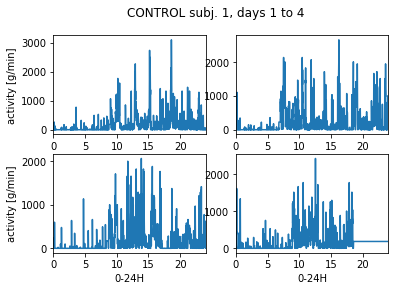

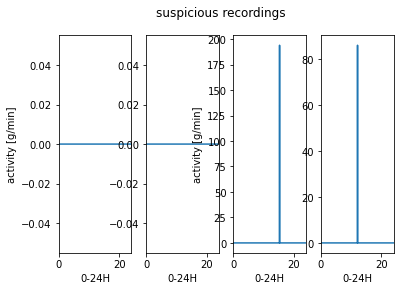

In [13]:
import matplotlib.pyplot as plt  
ax = np.arange(0, 24+0.0167, 0.0167) # X-Axis to plot 0-24H

# HOW DATA LOOKS LIKE? 
plt.figure(0)
plt.subplot(2,2,1)
plt.plot(ax, X[0])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,2)
plt.plot(ax, X[1])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,3)
plt.plot(ax, X[2])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,4)
plt.plot(ax, X[3])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.suptitle("CONTROL subj. 1, days 1 to 4")

# ARE THERE ANY INCONSISTENCIES?
threshold = 25 
X_mean = np.mean(X,axis=1)
sus = np.where(X_mean<threshold)
sus = sus[0]
print("there are approximately ",len(sus)," suspiciously low-activity days")
plt.figure()
plt.subplot(1,4,1)
plt.plot(ax,X[sus[0]]),plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(1,4,2)
plt.plot(ax,X[sus[1]]), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(1,4,3)
plt.plot(ax,X[sus[2]]),plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(1,4,4)
plt.plot(ax,X[sus[3]]), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.suptitle("suspicious recordings")

original dataset size:  (974, 1439)
 cleaned dataset size:  (761, 1439)


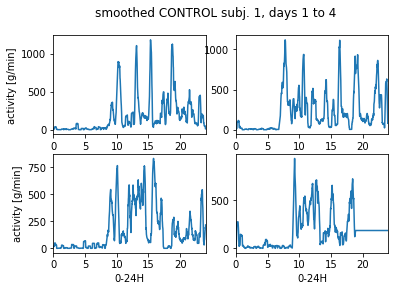

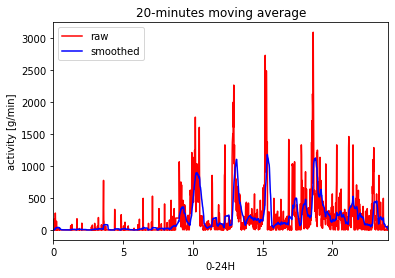

In [14]:
print("original dataset size: ",X.shape)
X = np.delete(X,sus,axis=0)
Y = np.delete(Y,sus,axis=0)
ID= np.delete(ID,sus,axis=0)
print(" cleaned dataset size: ",X.shape)

# input: time series ==> output: smoothed time series
def smooth(day,win):
    from scipy import signal
    import numpy as np
    
    L = win #L-point Moving Average filter
    b = (np.ones(L))/L #numerator co-effs of filter transfer function
    a = np.ones(1)   #denominator co-effs of filter transfer function
    x = day 
    y = signal.lfilter(b,a,x) #filter output using lfilter function
    return y

# 20-Minutes Moving Average Filter
window = 20
for i in range(0,X.shape[0]):
    day = X[i]
    smoothed_day = smooth(day,window)
    
    if i==0: 
        X_smooth = smoothed_day
    else: 
        X_smooth = np.vstack((X_smooth,smoothed_day))

    
plt.figure()
plt.subplot(2,2,1)
plt.plot(ax, X_smooth[0])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,2)
plt.plot(ax, X_smooth[1])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,3)
plt.plot(ax, X_smooth[2])
plt.ylabel("activity [g/min]"), plt.xlabel("0-24H"),plt.xlim(0,24)
plt.subplot(2,2,4)
plt.plot(ax, X_smooth[3])
plt.xlabel("0-24H"),plt.xlim(0,24)
plt.suptitle("smoothed CONTROL subj. 1, days 1 to 4")

plt.figure()
plt.title("20-minutes moving average")
plt.plot(ax,X[0],color='r',label="raw"),plt.ylabel("activity [g/min]")
plt.plot(ax,X_smooth[0],color='b',label="smoothed"),plt.xlabel("0-24H"),plt.xlim(0,24)
plt.legend()
plt.show()

In [15]:
# cosinor function: doing the fit ourselves
def cosinor(t,y):  
    t = t/360

    w=np.pi*2
    n=len(t)

    x = np.cos(w*t)
    z = np.sin(w*t)

    NE = sym.Matrix(   [[n,         np.sum(x),    np.sum(z),    np.sum(y)  ],
                    [np.sum(x), np.sum(x**2), np.sum(x*z),  np.sum(x*y)],
                    [np.sum(z), np.sum(x*z),  np.sum(z**2), np.sum(z*y)]]   )
    RNE = NE.rref()
    RNE = np.array(RNE[0])

    M = float(RNE[0][3])
    beta = float(RNE[1][3])
    gamma = float(RNE[2][3])

    import math
    Amp = math.sqrt((beta**2 + gamma**2))
    theta = np.arctan2(np.abs(gamma),np.abs(beta))

    # Calculate acrophase (phi) and convert from radians to degrees
    a = np.sign(beta);
    b = np.sign(gamma);
    if (a == 1 or a == 0) and b == 1:
        phi = -theta;
    elif a == -1 and (b == 1 or b == 0):
        phi = -pi + theta;
    elif (a == -1 or a == 0) and b == -1:
        phi = -pi - theta;
    elif a == 1 and (b == -1 or b == 0):
        phi = -2*pi + theta
    
    phi = float(phi)
    
    f = M + Amp*np.cos(w*t+phi)
    
    return f,M,Amp,phi
    plt.figure()
    visualize_data(t,f,style="plot",col="red")
    visualize_data(t,y,style="scatter",col="blue")
    plt.show()

control size:  (463, 1439)
condition size:  (297, 1439)


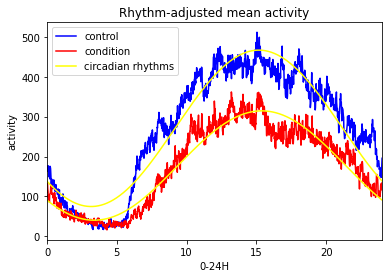

In [16]:
# get index of last control subj to separate the groups
istart,iend = get_subj_index("control",Ncontr,ID)

# rhythm-adjusted control mean
control = X[:iend]
print("control size: ",control.shape)
control_mean = np.mean(control,axis=0)

# rhythm-adjusted condition mean
condition = X[iend+1:]
print("condition size: ",condition.shape)
condition_mean = np.mean(condition,axis=0)

# Circaian Rhythms
t = np.linspace(0,360-(360/1439),1439)
import sympy as sym
from sympy import *
control_circadian_rh,control_MESOR,Amp,control_acro = cosinor(t,control_mean)
condition_circadian_rh,conition_MESOR,Amp,condition_acro = cosinor(t,condition_mean)

plt.figure()
plt.plot(ax,control_mean, color='b', label="control")
plt.plot(ax,condition_mean,color='r',label="condition")
plt.xlabel("0-24H"),plt.ylabel("activity  [g/min]"),plt.xlim(0,24)
visualize_data(ax,control_circadian_rh,style="plot",col="yellow",l='circadian rhythms')
visualize_data(ax,condition_circadian_rh,style="plot",col="yellow",T="Rhythm-adjusted mean activity",xl='0-24H',yl='activity')

plt.legend()

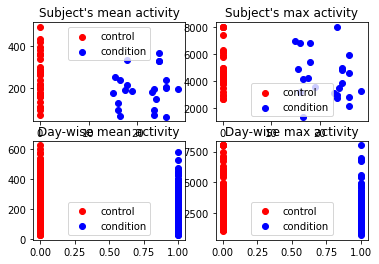

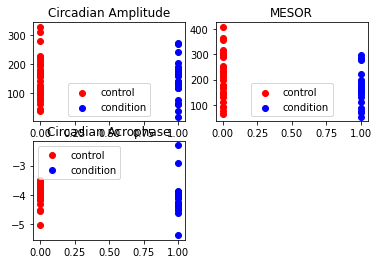

In [17]:
# subject-wise mean, max activity and circadian rhythm
for subj in range(0,Ncontr):
    subj_data = gather_data("control",subj+1)
    
    # we fit circadian rhythm on subject 24H activity rhythm
    rhythm = np.mean(subj_data,axis=0)
    
    # take only day time hours (from 5am)
    begin = 60* 5 
    
    subj_data = np.delete(subj_data, range(0,begin),axis = 1)
    subj_mean = np.mean(subj_data)
    subj_max  = np.max(subj_data)
    f,subj_MESOR,subj_amp,subj_acrophase = cosinor(t,rhythm)
    
    if subj == 0:
        control_subj_mean = subj_mean
        control_subj_max  = np.array(subj_max)
        control_acro = np.array(subj_acrophase)
        control_amp  = np.array(subj_amp)
        control_MESOR= np.array(subj_MESOR)
    else:
        control_subj_mean = np.hstack((control_subj_mean, subj_mean))
        control_subj_max = np.hstack((control_subj_max,subj_max))
        control_acro = np.hstack((control_acro, subj_acrophase))
        control_amp  = np.hstack((control_amp,subj_amp))
        control_MESOR= np.hstack((control_MESOR,subj_MESOR))
        
axe = np.zeros(Ncontr, dtype=float) 
    
for subj in range(0,Ncond):
    subj_data = gather_data("condition",subj+1)
    # we fit circadian rhythm on subject 24H activity rhythm
    rhythm = np.mean(subj_data,axis=0)
    
    # take only day time hours (from 5am)
    begin = 60* 5 

    
    subj_data = np.delete(subj_data, range(0,begin),axis = 1)
    subj_mean = np.mean(subj_data)
    subj_max  = np.max(subj_data)
    f,subj_MESOR,subj_amp,subj_acrophase = cosinor(t,rhythm)
    
    if subj == 0:
        condition_subj_mean = subj_mean
        condition_subj_max  = np.array(subj_max)
        condition_acro = np.array(subj_acrophase)
        condition_amp  = np.array(subj_amp)
        condition_MESOR= np.array(subj_MESOR)
    else:
        condition_subj_mean = np.hstack((condition_subj_mean, subj_mean))
        condition_subj_max = np.hstack((condition_subj_max,subj_max))
        condition_acro = np.hstack((condition_acro, subj_acrophase))
        condition_amp  = np.hstack((condition_amp,subj_amp))
        condition_MESOR= np.hstack((condition_MESOR,subj_MESOR))
        
# day-wise max activity
control_day_max = np.amax(control,axis=1)
condition_day_max=np.amax(condition,axis=1)

# day-wise mean activity
control_day_mean   = np.mean(control,axis = 1)
condition_day_mean = np.mean(condition,axis = 1)

plt.figure()
plt.subplot(2,2,1)
visualize_data(np.zeros(Ncontr, dtype=float), control_subj_mean, style="scatter",col="red",T="",l="control")
visualize_data(MADRS, condition_subj_mean,style="scatter",col="blue",T="Subject's mean activity",l="condition")
plt.legend()

plt.subplot(2,2,2)
visualize_data(np.zeros(Ncontr, dtype=float), control_subj_max, style="scatter",col="red",T="",l="control")
visualize_data(MADRS, condition_subj_max,style="scatter",col="blue",T="Subject's max activity",l="condition")
plt.legend()

plt.subplot(2,2,4)
visualize_data(np.zeros(len(control_day_max)), control_day_max, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_day_max)), condition_day_max,style="scatter",col="blue",T="Day-wise max activity",l="condition")
plt.legend()
               
plt.subplot(2,2,3)
visualize_data(np.zeros(len(control_day_mean)), control_day_mean, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_day_mean)), condition_day_mean,style="scatter",col="blue",T="Day-wise mean activity",l="condition")
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,2,1)
visualize_data(np.zeros(len(control_amp)), control_amp, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_amp)), condition_amp,style="scatter",col="blue",T="Circadian Amplitude",l="condition")
plt.legend()
plt.subplot(2,2,2)
visualize_data(np.zeros(len(control_MESOR)), control_MESOR, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_MESOR)), condition_MESOR,style="scatter",col="blue",T="MESOR",l="condition")
plt.legend()
plt.subplot(2,2,3)
visualize_data(np.zeros(len(control_acro)), control_acro, style="scatter",col="red",T="",l="control")
visualize_data(np.ones(len(condition_acro)), condition_acro,style="scatter",col="blue",T="Circadian Acrophase",l="condition")
plt.legend()
plt.show()

In [18]:
import scipy.stats as stats
th = 0.05

# mean activity
print("\n === day-wise mean ===")
t,p =stats.ranksums(control_day_mean, condition_day_mean)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)

print("\n === sbubject-wise mean ===")  
t,p =stats.ranksums(control_subj_mean, condition_subj_mean)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)
# max activity
print("\n === day-wise max ===")  
t,p =stats.ranksums(control_day_max, condition_day_max)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)

print("\n === subject-wise max ===")  
t,p =stats.ranksums(control_subj_max, condition_subj_max)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)

print("\n === subject-wise Acrophase ===")
t,p =stats.ranksums(control_acro, condition_acro)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)

print("\n === subject-wise Cycle Amplitude ===")
t,p =stats.ranksums(control_amp, condition_amp)
if p>th:
    print("null hypothesis accepted: groups' means are statistically equal")
else:
    print("null hypothesis rejected: groups' means are statistically different")
print("K = ",t,"; p-value: ",p)


 === day-wise mean ===
null hypothesis rejected: groups' means are statistically different
K =  11.416511436157998 ; p-value:  3.45839123198799e-30

 === sbubject-wise mean ===
null hypothesis accepted: groups' means are statistically equal
K =  1.8257507177130765 ; p-value:  0.06788781975847816

 === day-wise max ===
null hypothesis rejected: groups' means are statistically different
K =  8.11314426693139 ; p-value:  4.93264501377814e-16

 === subject-wise max ===
null hypothesis accepted: groups' means are statistically equal
K =  1.1688217211527638 ; p-value:  0.2424754670478474

 === subject-wise Acrophase ===
null hypothesis accepted: groups' means are statistically equal
K =  1.5868674462365993 ; p-value:  0.11254266924324113

 === subject-wise Cycle Amplitude ===
null hypothesis accepted: groups' means are statistically equal
K =  0.49482963377270295 ; p-value:  0.6207203844344442


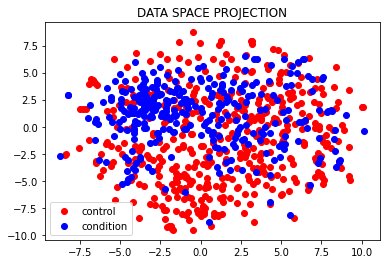

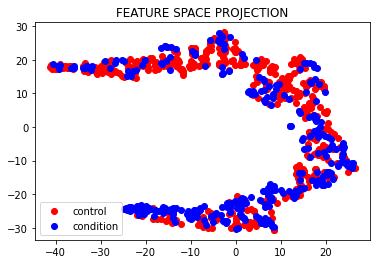

[[102  13]
 [ 40  36]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       115
           1       0.73      0.47      0.58        76

    accuracy                           0.72       191
   macro avg       0.73      0.68      0.68       191
weighted avg       0.72      0.72      0.71       191



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

ind = (np.where(Y==0))
ind = len(ind[0])
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
plt.figure()
visualize_data(X_embedded[:ind-1,0],X_embedded[:ind-1,1],style="scatter",col="red",T="",l="control")
visualize_data(X_embedded[ind:,0],X_embedded[ind:,1],style="scatter",col="blue",T="DATA SPACE PROJECTION",l="condition")
plt.legend()
plt.show()
X_features = feature_extract(X)

plt.figure()
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X_features)
visualize_data(X_embedded[:ind-1,0],X_embedded[:ind-1,1],style="scatter",col="red",T="",l="control")
visualize_data(X_embedded[ind:,0],X_embedded[ind:,1],style="scatter",col="blue",T="FEATURE SPACE PROJECTION",l="condition")
plt.legend()
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X_features,Y,random_state=100)

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

# cross validate the model
from sklearn.model_selection import cross_val_predict
y_pred =  cross_val_predict(svclassifier, X_test, y_test, cv=10)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [20]:
individual_pred = np.zeros(Ncontr+Ncond)
day_prediction = cross_val_predict(svclassifier, X_features, Y, cv=10)

for subj in (np.unique(ID)):
    subj_rec_idx = idx(ID,subj)   
    prediction = day_prediction[subj_rec_idx]
    individual_pred[subj] = np.median(prediction)

Y_test = np.ones(Ncontr+Ncond)
Y_test[:(Ncontr-1)]= 0;

print(classification_report(Y_test,individual_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77        31
         1.0       0.77      0.42      0.54        24

    accuracy                           0.69        55
   macro avg       0.72      0.66      0.65        55
weighted avg       0.71      0.69      0.67        55



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))